# **Regression Metrics**
Regression metrics are used to evaluate the performance of predictive models that aim to estimate a continuous target variable. These metrics help assess how well the model's predictions align with the actual values, allowing you to understand the accuracy, precision, and goodness of fit of your regression model. Here are some commonly used regression metrics:

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [2]:
df = pd.read_csv("D:\Coding\Datasets\Placement_SLR.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
# Check for the null values
df.isnull().sum()

cgpa       0
package    0
dtype: int64

## **Train Test Split**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("package", axis=1),
                                                    df["package"],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape , x_test.shape

((140, 1), (60, 1))

## **Plot the Data**

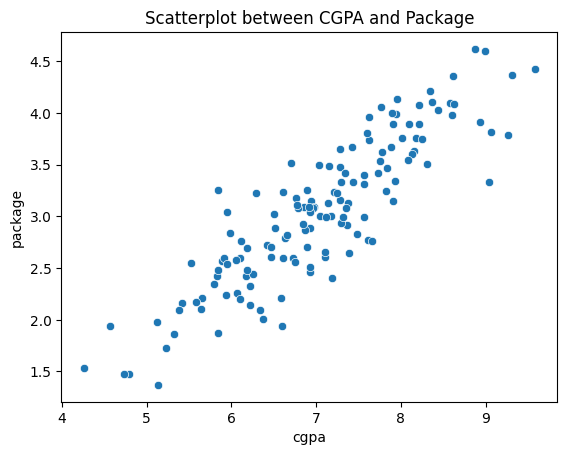

In [6]:
sns.scatterplot(x=x_train["cgpa"], y=y_train)
plt.title("Scatterplot between CGPA and Package")
plt.show()

## **Train a Simple Linear Regression Model**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Instantiate an object of the LinearRegression class
lr = LinearRegression()

# Fit the training data
lr.fit(x_train, y_train)

LinearRegression()

In [9]:
# Predict the test data
y_pred = lr.predict(x_test)
y_pred

array([2.98741886, 2.56299265, 2.62783555, 3.4295295 , 3.07584099,
       2.36256917, 3.54742567, 2.47457053, 4.16638056, 3.24089563,
       2.12677683, 3.2173164 , 2.54530823, 3.06994618, 3.39416065,
       2.8754175 , 2.63962516, 2.83415384, 2.37435878, 2.93436559,
       3.18784235, 2.33898993, 3.53563605, 4.03079997, 2.20340934,
       1.9027741 , 3.10531503, 2.61604593, 1.91456372, 1.8968793 ,
       2.92847078, 3.73016473, 2.61015112, 2.09140798, 2.51583419,
       3.67711146, 3.19373716, 2.98741886, 3.87164014, 2.50993938,
       3.14068389, 1.90866891, 3.79500763, 2.98741886, 3.99543112,
       4.29606635, 2.48636014, 3.00510329, 3.25858005, 1.75540389,
       3.29984371, 2.46867572, 3.54153086, 2.42151725, 3.7773232 ,
       2.74573172, 3.23500082, 3.09942023, 4.42575213, 2.33898993])

## **Plot the Regression Line**

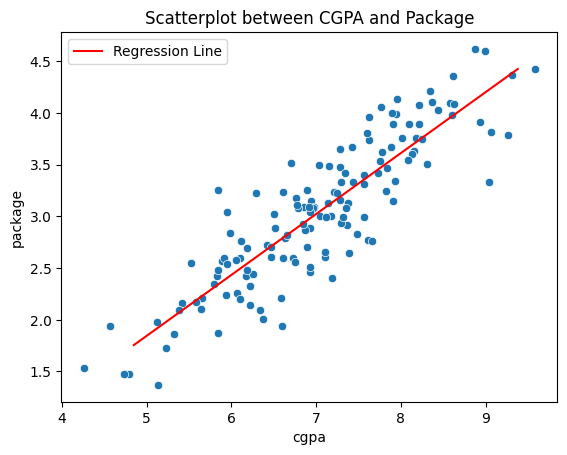

In [10]:
sns.scatterplot(x=x_train["cgpa"], y=y_train)
sns.lineplot(x=x_test["cgpa"], y=lr.predict(x_test), c="red", label="Regression Line")
plt.title("Scatterplot between CGPA and Package")
plt.show()

## **Check the Accuracy using Regression Metrics**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Mean Absolute Error (MAE):**
MAE is the average of the absolute differences between the predicted and actual values. It measures the average magnitude of errors and is easy to understand.

**Advantages:**
* Easy to interpret as it represents the average absolute error.
* Resistant to outliers, as it does not square errors.

**Disadvantages:**
* Does not penalize larger errors more heavily.
* May not work well if the error distribution is not symmetric.

**Formula:**<br>
<center><img src="https://editor.analyticsvidhya.com/uploads/42439Screenshot%202021-10-26%20at%209.34.08%20PM.png" style="width:30%"></center>

In [12]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae.round(2))

Mean Absolute Error (MAE): 0.26


### **Mean Squared Error (MSE):**
MSE measures the average of the squared differences between the predicted and actual values. It gives more weight to larger errors and penalizes them.

**Advantages:**
* Provides a measure of how well the model performs while penalizing larger errors.
* Mathematically convenient and commonly used in optimization algorithms.

**Disadvantages:**
* The squared nature of the metric makes it sensitive to outliers.
* The units of MSE are not the same as the target variable, making it less interpretable.

**Formula:**<br>
<center><img src="https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG" style="width:30%"> </center>

In [13]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(2))

Mean Squared Error (MSE): 0.1


### **Root Mean Squared Error (RMSE):**
RMSE is the square root of the MSE. It provides a more interpretable metric in the same units as the target variable.

**Advantages:**
* Shares the same unit as the target variable, which makes it more interpretable than MSE.
* Balances the sensitivity to outliers found in MSE.

**Disadvantages:**
* Like MSE, it can still be sensitive to outliers.
* Not as intuitive as MAE.

**Formula:**<br>
<center><img src="https://miro.medium.com/v2/resize:fit:966/1*lqDsPkfXPGen32Uem1PTNg.png" style="width:25%"> </center>

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse.round(2))

Root Mean Squared Error (RMSE): 0.32


### **R-squared (R²):**
R-squared measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

**Advantages:**
* Provides a measure of goodness of fit, indicating how well the model explains the variance in the data.
* Values range from 0 to 1, where higher values suggest a better fit.

**Disadvantages:**
* It may increase when adding more predictors, even if they are irrelevant (overfitting).
* R-squared alone doesn't reveal the direction or magnitude of individual errors.

**Formula:**<br>
<center><img src="https://i0.wp.com/www.fairlynerdy.com/wp-content/uploads/2017/01/r_squared_5.png?resize=625%2C193" style="width:30%"> </center>

<center><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*EjMnICEPkm0VzoLetqeYbw.jpeg" style="width:60%"> </center>

In [15]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2.round(2))

R2 Score: 0.75


### **Adjusted R-squared:**
Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of irrelevant predictors.

**Advantages:**
* Adjusts R-squared to account for the number of predictors, helping to mitigate overfitting.
* Offers a more realistic assessment of model fit in multiple regression.

**Disadvantages:**
* It can still be influenced by outliers and unrepresentative samples.

**Formula:**<br>
<center><img src="https://i.stack.imgur.com/RcGf6.png" style="width:50%"> </center>

In [16]:
n = len(x_test) # Total Sample Size
p = len(x_test.columns) # Number of independent variable

In [17]:
adusted_r2 = 1 - ((1 - r2)*(n - 1) / (n - p - 1))
print("Adjusted R2 Score:", adusted_r2.round(2))

Adjusted R2 Score: 0.75
